<div class="hide">\pagebreak</div>
## Evaluating NBA Game Predictions

In [1]:
# Run this cell to set up the notebook, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

#### A brief introduction to sports betting
In a basketball game, each team scores some number of points.  Conventionally, the team playing at its own arena is called the "home team," and the other team is called the "away team."  The winner, of course, is the team with the most points.  So we could summarize what happened in a game by the following number:

$$\text{outcome} = \text{points scored by the away team} - \text{points scored by the home team}$$

If this number is positive, the away team won.  If it's negative, the home team won.  For brevity, we'll use the shorthand **"outcome"** for **the away team's score minus the home team's score**.

Casinos in Las Vegas offer bets on the outcomes of NBA games.  One kind of bet works like this:

1. The casino decides on a "spread."
2. You can bet \$11 that the outcome will be above the spread, or \$11 that the outcome will be below the spread.
3. After the game, you end up with \$21 if you guessed correctly, and \$0 if you guessed incorrectly.

The analysts at the casino try to choose the spread so that (according to their analysis of the teams) there is a 50% chance that the outcome will be below that amount, and a 50% chance that the outcome will be above that amount.

**[tl;dr](https://en.wikipedia.org/wiki/Wikipedia:Too_long;_didn%27t_read): The spread is the casino's best guess at the outcome (the away team's score minus the home team's score).**

The table `spreads` contains spreads from the betting website [Covers](http://www.covers.com) from every game in the 2014 NBA season, plus actual game outcomes.  

In [2]:
spreads = Table.read_table("spreads.csv")
spreads

Date,Home Team,Away Team,Home Points,Away Points,Outcome,Spread
4/10/2015,Utah,Memphis,88,89,1,2.5
3/10/2015,Utah,New York,87,82,-5,-13
11/19/2014,Indiana,Charlotte,88,86,-2,-2
11/15/2014,Chicago,Indiana,90,99,9,-9
3/25/2015,Utah,Portland,89,92,3,-2
3/3/2015,Memphis,Utah,82,93,11,-7
3/18/2015,Utah,Washington,84,88,4,-3
3/16/2015,Utah,Charlotte,94,66,-28,-4.5
1/24/2015,Charlotte,New York,76,71,-5,-9
11/7/2014,Oklahoma City,Memphis,89,91,2,7


<div class="hide">\pagebreak</div>
#### Question 1
Make a scatter plot of the outcomes and spreads, with the spreads on the horizontal axis.

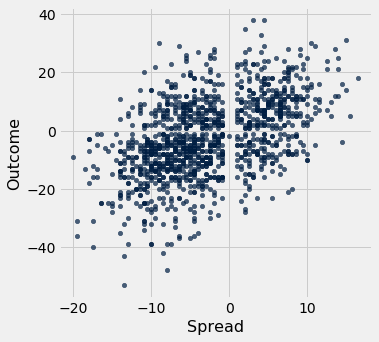

In [3]:
spreads.scatter('Spread','Outcome')

<div class="hide">\pagebreak</div>
You might notice that spreads and outcomes are (almost) never 0.  It's because a game of basketball never ends in a tie; one team has to win.

Let's investigate how well the casinos are predicting game outcomes.

One question we can ask is: Is the casino's prediction correct on average? In other words, for every value of the spread, is the average outcome of games assigned that spread equal to the spread? If not, the casino would apparently be making a systematic error in its predictions.

#### Question 2
Among games with a spread around 5 (concretely: in the range $[3.5, 6.5]$), what was the average outcome?

In [8]:
spreads_around_5 = spreads.where('Spread', are.between_or_equal_to(3.5,6.5)).column('Spread')
spread_5_outcome_average = sum(spreads_around_5)/len(spreads_around_5)
print("Average outcome:", spread_5_outcome_average)

Average outcome: 4.955882352941177


Instead of doing that for each possible spread, we can use linear regression to predict an outcome for any spread.

<div class="hide">\pagebreak</div>
#### Question 3
If the average outcome for games with each spread is roughly equal to that spread, what would you expect the slope and intercept of the linear regression line to be?  Or is it impossible to say?  If it's impossible, use the cell below to write a comment explaining why.  Otherwise, write the expected slope and intercept.

In [10]:
expected_slope = 1
expected_intercept = 0

Let's compute the regression line and find out if that's the case.  This takes a few steps.

<div class="hide">\pagebreak</div>
#### Question 4
Define a function called `standard_units`.  It should take an array of numbers as its argument and return an array of those numbers in standard units.

In [11]:
def standard_units(nums):
    """Converts an array of numbers to standard units."""
    z = (nums - np.mean(nums))/np.std(nums)
    return z

<div class="hide">\pagebreak</div>
#### Question 5
Compute the correlation between outcomes and spreads.

In [13]:
spread_r = np.mean(standard_units(spreads.column('Outcome')) * standard_units(spreads.column('Spread')))
spread_r

0.49181413688314235

<div class="hide">\pagebreak</div>
#### Question 6
Compute the slope and intercept of the least-squares linear regression line that predicts outcomes from spreads.

In [14]:
spread_slope = spread_r * (np.std(spreads.column('Outcome'))/np.std(spreads.column('Spread')))
spread_intercept = np.mean(spreads.column('Spread')) - spread_slope * np.mean(spreads.column('Outcome'))
print("predicted outcome = {:f}*spread + {:f}".format(spread_slope, spread_intercept))

predicted outcome = 0.953927*spread + -0.458067


<div class="hide">\pagebreak</div>
#### Question 7
For each game in `spreads`, compute the predicted outcome using your regression line.  Add these to `spreads` as a column called `"Predicted outcome"`, naming the resulting table `with_predictions`.

In [17]:
with_predictions = spreads.with_column('Predicted outcome', spreads.column('Spread') * 0.953927 - 0.458067)
with_predictions

Date,Home Team,Away Team,Home Points,Away Points,Outcome,Spread,Predicted outcome
4/10/2015,Utah,Memphis,88,89,1,2.5,1.92675
3/10/2015,Utah,New York,87,82,-5,-13,-12.8591
11/19/2014,Indiana,Charlotte,88,86,-2,-2,-2.36592
11/15/2014,Chicago,Indiana,90,99,9,-9,-9.04341
3/25/2015,Utah,Portland,89,92,3,-2,-2.36592
3/3/2015,Memphis,Utah,82,93,11,-7,-7.13556
3/18/2015,Utah,Washington,84,88,4,-3,-3.31985
3/16/2015,Utah,Charlotte,94,66,-28,-4.5,-4.75074
1/24/2015,Charlotte,New York,76,71,-5,-9,-9.04341
11/7/2014,Oklahoma City,Memphis,89,91,2,7,6.21942


Here's a plot of the predictions.

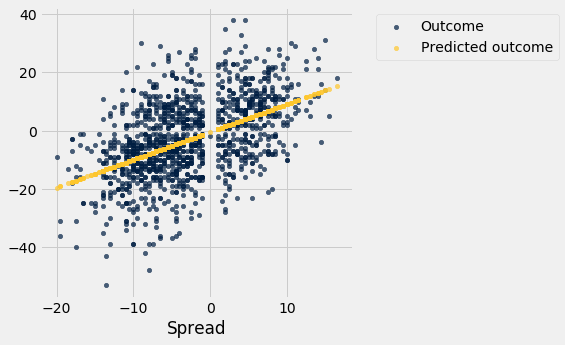

In [18]:
with_predictions.scatter("Spread", make_array("Outcome", "Predicted outcome"))

<div class="hide">\pagebreak</div>
#### Question 8
Is it true that the average outcome for games with each spread is around that spread?

*Yes*

<div class="hide">\pagebreak</div>
#### Question 9
Do you think the casino predicted game outcomes *accurately*?  What number would you use to quantify that?

*Yes, I use the scatter plot to quantify that.*